# This script demonstrates the least square approximate solution
# Name : Sunjun Hwang
# Student ID : 20151766
# github link : https://github.com/tjswns494/Mathematical-Foundations-for-Computer-Vision-and-Machine-Learning-assignment.git


# import packages for plotting images and manipulating data and construct table:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read image

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images


# define normalize function

In [3]:

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# make a matrix each column of which represents an images in a vector form 

In [4]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

# split image in to one column vector

In [5]:
count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1


# define b= -1 if b is not 0, b=1 if b is 0

In [6]:
b=list_label_train.T
for i in range (b.size):
        if b[i]!=0:
            b[i]=-1
        else:
            b[i]=1

# define least square function

In [7]:

def lsp(list_image_train,list_label_train,p):
    result=np.zeros(list_label_train.size)
    A=list_image_train.T
    s=np.random.normal(0, 1, (p,784))
    A1=s.dot(A.T)
    
    lsp_result=np.linalg.pinv(A1.dot(A1.T)).dot(A1).dot(b)
    test=s.dot(list_image_test)
    for i in range(p):
        result=lsp_result.dot(test)
    return result


# define the ^{f} classifier

In [8]:
def fhat(label):
    for i in range (label.size):
        if label[i]>=0:
            label[i]=1
        else:
            label[i]=-1
    return label


# define F1

In [9]:
def f1(fhat_result):
    TF_classifier=np.zeros(fhat_result.size)
    TP=np.zeros(size_row* size_col)
    FP=np.zeros(size_row* size_col)
    FN=np.zeros(size_row* size_col)
    TN=np.zeros(size_row* size_col)
    TP_num,FP_num,FN_num,TN_num=0,0,0,0

    for i in range(fhat_result.size):
        if fhat_result[i] == 1 and list_label_test.T[i]==0:
            TF_classifier[i]=0 #it means TP
            TP+=list_image_test.T[i]
            TP_num+=1
        elif fhat_result[i]==1 and list_label_test.T[i]!=0:
            TF_classifier[i]=1 #it means FP
            FP+=list_image_test.T[i]
            FP_num+=1
        elif fhat_result[i]==-1 and list_label_test.T[i]==0:
            TF_classifier[i]=1 #it means FN
            FN+=list_image_test.T[i]
            FN_num+=1
        elif fhat_result[i]==-1 and list_label_test.T[i]!=0:
            TF_classifier[i]=1 #it means TN 
            TN+=list_image_test.T[i]
            TN_num+=1
    precision=TP_num/(TP_num+FP_num)
    recall=TP_num/(FN_num+TP_num)
    f1=2*precision*recall/(precision+recall)
    TP=TP/TP_num
    FP=FP/FP_num
    FN=FN/FN_num
    TN=TN/TN_num
       
    p1=plt.subplot(1,4,1)
    p1.set_title('TP')
    TP   = TP.reshape(size_row, size_col)
    plt.imshow(TP, cmap='Greys')
    plt.axis('off')
    
    p2=plt.subplot(1,4,2)
    p2.set_title('FP')
    FP   = FP.reshape(size_row, size_col)
    plt.imshow(FP, cmap='Greys')
    plt.axis('off')
    
    p3=plt.subplot(1,4,3)
    p3.set_title('FN')
    FN   = FN.reshape(size_row, size_col)
    plt.imshow(TP, cmap='Greys')
    plt.axis('off')
       
    p4=plt.subplot(1,4,4)
    p4.set_title('TN')
    TN   = TN.reshape(size_row, size_col)
    plt.imshow(TN, cmap='Greys')
    plt.axis('off')

    plt.show()
    return f1



# results with different number of parameter p

p: 1000


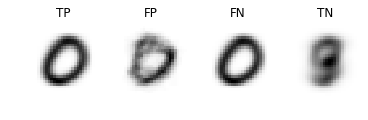

p: 1200


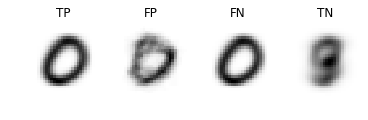

p: 1400


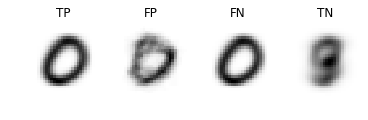

p: 1600


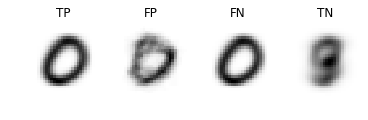

p: 1800


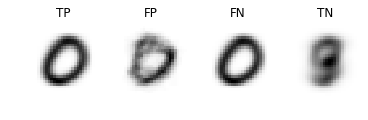

p: 2000


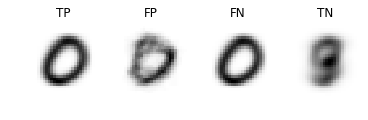

p: 2200


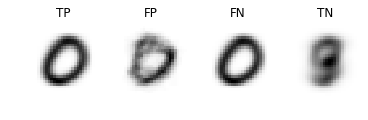

p: 2400


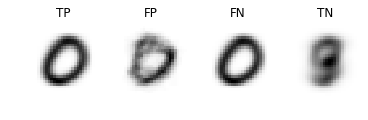

p: 2600


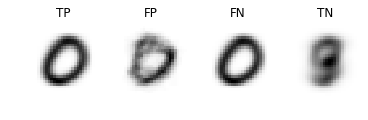

p: 2800


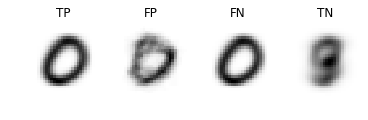

In [11]:
f1_result=np.zeros(10)
p=[1000,1200,1400,1600,1800,2000,2200,2400,2600,2800]
for i in range(10):
    print("p: "+str(p[i]))
    lsp_result=lsp(list_image_train,list_label_train,p[i])
    fhat_result=fhat(lsp_result)
    f1_result[i]=f1(fhat_result)

# print best F1 score

best p is 1000


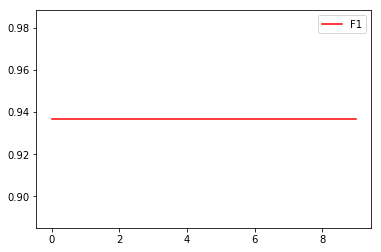

In [12]:
m=pd.Series(f1_result).idxmax()
print("best p is " +str(p[m]))
plt.figure()
plt.plot(f1_result,color='r',label='F1')
plt.legend()
plt.show()